# PyTorch Basics - Tensors and Autograd
### By [Akshaj Verma](https://akshajverma.com)  

This notebook takes you through a few of the most commonly used tensor operations as well as demonstrate the autograd functionality of PyTorch.

In [1]:
import numpy as np

import torch
from torch.autograd import grad

## Tensor Operations

### Create an unitialised tensor.

In [2]:
x = torch.LongTensor(3, 4)
print(x)

tensor([[140124855070912, 140124855070984, 140124855071056, 140124855071128],
        [140124855071200, 140124855071272, 140124855068720, 140125080614480],
        [140125080521392, 140124855066736, 140124855066800, 140124855066864]])


In [3]:
x = torch.FloatTensor(3, 4)
print(x)

tensor([[1.7288e+25, 4.5717e-41, 1.7288e+25, 4.5717e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.7523e+23, 1.8788e+31, 1.7220e+22]])


### Create a tensor manually

In [4]:
x1 = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
x1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Create tensor from a list

In [5]:
py_list = [[1, 2, 3], [4, 5, 6]]
print('List: \n', py_list, '\n')

print('Tensor:')
print(torch.tensor(py_list))

List: 
 [[1, 2, 3], [4, 5, 6]] 

Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])


### Create tensor from a numpy array

In [6]:
numpy_array = np.random.random((3, 4)).astype(float)
print('Float numpy array: \n', numpy_array, '\n')

print('Float Tensor:')
print(torch.FloatTensor(numpy_array))

Float numpy array: 
 [[0.03161911 0.52214984 0.06134578 0.03143846]
 [0.72253513 0.1396692  0.14399402 0.02879052]
 [0.01618331 0.41498778 0.60040201 0.95173069]] 

Float Tensor:
tensor([[0.0316, 0.5221, 0.0613, 0.0314],
        [0.7225, 0.1397, 0.1440, 0.0288],
        [0.0162, 0.4150, 0.6004, 0.9517]])


### Convert tensor to a numpy array

In [7]:
print('Tensor:')
print(x1)

print('\nNumpy array:')
print(x1.numpy())

Tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Numpy array:
[[1. 2. 3.]
 [4. 5. 6.]]


### Create tensor within a range

In [8]:
# Create tensor from 0 to 10.
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
torch.arange(10, dtype=torch.float)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
torch.arange(10, dtype=torch.long)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Create tensor with random values

In [11]:
torch.randn(3, 4)

tensor([[ 0.6797,  1.3238, -0.5602, -0.6977],
        [ 1.1281, -0.8198, -0.2968, -0.1166],
        [ 0.8521, -1.0367,  0.5664, -0.7052]])

In [12]:
# Only positive values
torch.rand(3, 4)

tensor([[0.8505, 0.8817, 0.2612, 0.8152],
        [0.6652, 0.3061, 0.0246, 0.4880],
        [0.7158, 0.6929, 0.4464, 0.0923]])

### Create tensor as identity matrix

In [13]:
torch.eye(3, 3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Create tensor with all zeros

In [14]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Create tensor with all ones

In [15]:
torch.ones(3, 4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Index a tensor

In [16]:
print(x1, '\n')
print(f"Tensor at x1[0,0] = {x1[0, 0]}")
print(f"Tensor at x1[1,2] = {x1[1, 2]}")
print(f"0th column of x1 = {x1[:, 0]}")
print(f"1st row of x1 = {x1[1, :]}")

tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

Tensor at x1[0,0] = 1.0
Tensor at x1[1,2] = 6.0
0th column of x1 = tensor([1., 4.])
1st row of x1 = tensor([4., 5., 6.])


### Shape of a tensor

In [17]:
print(x1, '\n')
print(x1.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

torch.Size([2, 3])


### Reshape a tensor

In [18]:
x2 = torch.arange(10, dtype=torch.float)
x2

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [19]:
x2.view(2, 5)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

`-1` auto-identifies the dimension based on the size of the tensor.

In [20]:
x2.view(5, -1)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [21]:
x2.reshape(5, -1)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

### Change tensor axis

`view` and `permute` are slighlty different. `view` changes the order of the tensors while `permute` only changes the axis.  

In [22]:
print("x1: \n", x1)
print("\nx1.shape: \n", x1.shape)
print("\nx1.view(3, -1): \n", x1.view(3, -1))
print("\nx1.permute(1, 0): \n", x1.permute(1, 0))

x1: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])

x1.shape: 
 torch.Size([2, 3])

x1.view(3, -1): 
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

x1.permute(1, 0): 
 tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### Get contents of a tensor

In [23]:
print(x2)
print(x2[3])
print(x2[3].item())

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor(3.)
3.0


### Get the mean value of a tensor

In [24]:
print(x1)
torch.mean(x1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


tensor(3.5000)

### Get the sum of values in a tensor

In [25]:
print(x1)
torch.sum(x1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


tensor(21.)

### Get e^x values for a tensor

In [26]:
print(x1)
torch.exp(x1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

### Arithmetic operations with tensors

In [27]:
x3 = torch.randn(5, 2)
x4 = torch.randn(5, 2)

print(f"x3 + x4 = \n{x3 + x4}\n")
print(f"x3 - x4 = \n{x3 - x4}\n")
print(f"x3 * x4  (element wise)= \n{x3 * x4}\n")
# You can also do [x3 @ x4.t()] for matrix multiplication.
print(f"x3 @ x4  (matrix mul)= \n{torch.matmul(x3, x4.t())}\n")


x3 + x4 = 
tensor([[-0.1989,  1.9295],
        [-0.1405, -0.8919],
        [-0.6190, -3.6546],
        [-1.4263, -0.1889],
        [ 0.7664, -0.6130]])

x3 - x4 = 
tensor([[ 1.5613, -1.8650],
        [-2.2483, -1.9581],
        [ 0.4915,  0.6334],
        [ 2.0189, -2.8248],
        [-2.5310, -4.7337]])

x3 * x4  (element wise)= 
tensor([[-0.5995,  0.0612],
        [-1.2588, -0.7597],
        [ 0.0354,  3.2387],
        [-0.5104, -1.9860],
        [-1.4547, -5.5080]])

x3 @ x4  (matrix mul)= 
tensor([[-0.5384,  0.7351, -0.4474, -1.1310,  1.1895],
        [-1.6525, -2.0185,  3.7184,  0.1793, -4.9052],
        [-2.8099, -0.8725,  3.2741, -1.8812, -3.2174],
        [-3.1196, -0.4911,  3.0662, -2.4964, -2.6162],
        [-4.2954, -2.3551,  6.2215, -2.0035, -6.9626]])



### Concatenate Tensors

Concatenate rows.

In [28]:
x5, x6 = torch.randn(4, 7), torch.randn(3, 7)
print('X5:', x5.shape)
print(x5)
print('\nX6:', x6.shape)
print(x6)

print('\nConcatenated tensor', torch.cat((x5, x6)).shape)
print(torch.cat((x5, x6)))

X5: torch.Size([4, 7])
tensor([[ 0.9009, -0.7907,  0.2602, -1.4544,  1.0479, -1.1085,  0.9261],
        [ 0.2041, -1.2046, -0.8984,  1.6531,  0.2567, -0.0466,  0.1195],
        [-0.7890, -0.0156,  0.2190, -1.5073, -0.2212,  0.4541,  0.7874],
        [ 0.7968, -0.1711, -1.0618, -0.1209, -0.4825, -0.7380, -2.1153]])

X6: torch.Size([3, 7])
tensor([[-1.1890,  0.1310,  1.7379,  1.8666,  1.4759,  1.9887,  1.1943],
        [ 0.1609, -0.3116,  0.5274,  1.3037, -1.2190, -1.6068,  0.5382],
        [ 1.0021,  0.5119,  1.7237, -0.3709, -0.1801, -0.3868, -1.0468]])

Concatenated tensor torch.Size([7, 7])
tensor([[ 0.9009, -0.7907,  0.2602, -1.4544,  1.0479, -1.1085,  0.9261],
        [ 0.2041, -1.2046, -0.8984,  1.6531,  0.2567, -0.0466,  0.1195],
        [-0.7890, -0.0156,  0.2190, -1.5073, -0.2212,  0.4541,  0.7874],
        [ 0.7968, -0.1711, -1.0618, -0.1209, -0.4825, -0.7380, -2.1153],
        [-1.1890,  0.1310,  1.7379,  1.8666,  1.4759,  1.9887,  1.1943],
        [ 0.1609, -0.3116,  0.5274,

In [29]:
x7, x8 = torch.randn(3, 3), torch.randn(3, 5)
print('X7:', x7.shape)
print(x7)
print('\nX8:', x8.shape)
print(x8)

print('\nConcatenated tensor', torch.cat((x7, x8), 1).shape)
print(torch.cat((x7, x7), 1))

X7: torch.Size([3, 3])
tensor([[-1.1606,  1.5264,  1.4718],
        [ 0.9691, -0.1215, -0.1852],
        [-0.5792, -1.2848, -0.8485]])

X8: torch.Size([3, 5])
tensor([[ 0.3518, -0.2296,  0.5546,  1.5093,  1.6241],
        [ 0.8275, -1.1022, -0.1441, -0.3518,  0.4338],
        [-0.1501, -1.1083,  0.3815, -0.5076,  0.5819]])

Concatenated tensor torch.Size([3, 8])
tensor([[-1.1606,  1.5264,  1.4718, -1.1606,  1.5264,  1.4718],
        [ 0.9691, -0.1215, -0.1852,  0.9691, -0.1215, -0.1852],
        [-0.5792, -1.2848, -0.8485, -0.5792, -1.2848, -0.8485]])


### Find min/max value in a tensor

In [30]:
print('Tensor x1:')
print(x1)

print('\nMax value in the tensor:')
print(torch.max(x1))

print('\nIndex of the max value in the tensor')
print(torch.argmax(x1))

print('\nMin value in the tensor:')
print(torch.min(x1))

print('\nIndex of the min value in the tensor')
print(torch.argmin(x1))

Tensor x1:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Max value in the tensor:
tensor(6.)

Index of the max value in the tensor
tensor(5)

Min value in the tensor:
tensor(1.)

Index of the min value in the tensor
tensor(0)


### Remove dimensions from a tensor

`torch.squeeze()` removes all 1-dimensional parts from a tensor.

In [31]:
x9 = torch.zeros(2, 1, 3, 1, 5)
print('Tensor:')
print(x9)

print('\nTensor shape:')
print(x9.shape)

print('\nTensor after torch.squeeze():')
print(x9.squeeze())

print('\nTensor shape after torch.squeeze():')
print(x9.squeeze().shape)

Tensor:
tensor([[[[[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]]]],



        [[[[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0.]]]]])

Tensor shape:
torch.Size([2, 1, 3, 1, 5])

Tensor after torch.squeeze():
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

Tensor shape after torch.squeeze():
torch.Size([2, 3, 5])


In [32]:
x10 = torch.zeros(3, 1)
print('Tensor:')
print(x10)

print('\nTensor shape:')
print(x10.shape)

print('\nTensor shape after torch.squeeze(0):')
print(x10.squeeze(0).shape)

print('\nTensor shape after torch.squeeze(1):')
print(x10.squeeze(1).shape)

Tensor:
tensor([[0.],
        [0.],
        [0.]])

Tensor shape:
torch.Size([3, 1])

Tensor shape after torch.squeeze(0):
torch.Size([3, 1])

Tensor shape after torch.squeeze(1):
torch.Size([3])


## Backpropagation using Autograd 

If `requires_grad=True`, the Tensor object keeps track of how it was created.

In [33]:
x = torch.tensor([1., 2., 3.], requires_grad = True)
print('x: ', x)

y = torch.tensor([10., 20., 30.], requires_grad = True)
print('y: ', y)

z = x + y 
print('\nz = x + y')
print('z:', z)

x:  tensor([1., 2., 3.], requires_grad=True)
y:  tensor([10., 20., 30.], requires_grad=True)

z = x + y
z: tensor([11., 22., 33.], grad_fn=<AddBackward0>)


Since, `requires_grad=True`, `z` knows that it was created by the addition of two tensors `z = x + y`.

In [34]:
s = z.sum()
print(s)

tensor(66., grad_fn=<SumBackward0>)


`s` knows that it was created by the sum of it's numbers. When we call `.backward()` on `s`, backrop is run starting from `s`. We can then calculate the gradients.

In [35]:
s.backward()
print('x.grad: ', x.grad)
print('y.grad: ', y.grad)

x.grad:  tensor([1., 1., 1.])
y.grad:  tensor([1., 1., 1.])


### Autograd Example


Good Resources : 

[Slides from University of Oslo](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v19/material/week4/IN5400_2019_week4_intro_to_pytorch.pdf#page=39&zoom=100,-87,505)


[Elliot Wate - YouTube](https://www.youtube.com/watch?v=MswxJw-8PvE)


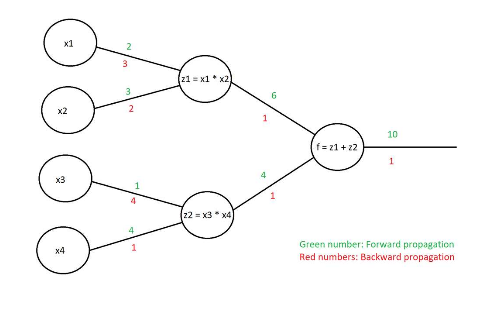

In [36]:
x1 = torch.tensor(2, dtype = torch.float32, requires_grad = True)
x2 = torch.tensor(3, dtype = torch.float32, requires_grad = True)
x3 = torch.tensor(1, dtype = torch.float32, requires_grad = True)
x4 = torch.tensor(4, dtype = torch.float32, requires_grad = True)

In [37]:
z1 = x1 * x2 
z2 = x3 * x4
f = z1 + z2

In [38]:
gradients = grad(outputs=f, inputs = [x1, x2, x3, x4, z1, z2])
gradients

(tensor(3.), tensor(2.), tensor(4.), tensor(1.), tensor(1.), tensor(1.))

In [39]:
print(f"Gradient of x1 = {gradients[0]}")
print(f"Gradient of x2 = {gradients[1]}")
print(f"Gradient of x3 = {gradients[2]}")
print(f"Gradient of x4 = {gradients[3]}")
print(f"Gradient of z1 = {gradients[4]}")
print(f"Gradient of z2 = {gradients[5]}")

Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0
Gradient of z1 = 1.0
Gradient of z2 = 1.0


A **leaf tensor** is a tensor that is created directly and not as a result of any arithmetic operation.  
In the above case, *x1, x2, x3, x4* are leaf tensors while *z1* and *z2* are not.

Instead of specifying all the inputs to calculate the gradient using `grad(outputs=f, inputs = [x1, x2, x3, x4, z1, z2])`, we can use `tensor.backward()` to auto calculate all the gradients.

In [40]:
x1 = torch.tensor(2, dtype = torch.float32, requires_grad = True)
x2 = torch.tensor(3, dtype = torch.float32, requires_grad = True)
x3 = torch.tensor(1, dtype = torch.float32, requires_grad = True)
x4 = torch.tensor(4, dtype = torch.float32, requires_grad = True)

z1 = x1 * x2 
z2 = x3 * x4
f = z1 + z2

f.backward()

In [41]:
print(f"Gradient of x1 = {x1.grad}")
print(f"Gradient of x2 = {x2.grad}")
print(f"Gradient of x3 = {x3.grad}")
print(f"Gradient of x4 = {x4.grad}")
print(f"Gradient of z1 = {z1.grad}")
print(f"Gradient of z2 = {z2.grad}")

Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0
Gradient of z1 = None
Gradient of z2 = None


We can make the gradients 0 using `x.grad.zero_`.  

In [42]:
print(x1.grad.zero_())

tensor(0.)
